# Testaufgabe - Satzlängenanalyse mit SpaCy

Wir arbeiten mit Texten. Unser Ziel ist es, Texte zu analysieren und zu bewerten.

Es gibt sehr viele Möglichkeiten einen Text zu bewerten oder zu charakterisieren. Eine recht einfache Methode ist die Analyse von Satzlängen in einem Text.

Um einzelne Sätz in einem Text zu erkennen nutzen wir [SpaCy](https://spacy.io/).

#### Beispieltext:

In [1]:
text = """
    Clean Code ist ein Begriff aus der Softwaretechnik, der seinen Ursprung im gleichnamigen Buch von Robert Cecil Martin hat. 
    Als „sauber“ bezeichnen Softwareentwickler in erster Linie Quellcode, aber auch Dokumente, Konzepte, Regeln und Verfahren, 
    die intuitiv verständlich sind. Als intuitiv verständlich gilt alles, was mit wenig Aufwand und in kurzer Zeit richtig 
    verstanden werden kann. Vorteile von Clean Code sind stabilere und effizient wartbarere Programme, d. h. kürzere 
    Entwicklungszeiten bei Funktionserweiterung und Fehlerbehebungen. Die Bedeutung wächst mit der Beobachtung, 
    dass im Schnitt 80 % der Lebensdauer einer Software auf den Wartungszeitraum entfällt.
    Die Notwendigkeit, Code noch nach der Entwicklung von „unsauberen“ Stellen zu reinigen, wird häufig nicht 
    gesehen oder vom Management nicht bewilligt, sobald das Programm seine vorgesehene Funktion ausübt. 
    Ein direktes Schreiben von „sauberem“ Code ist nahezu unmöglich, kann jedoch durch den bewussten Umgang 
    mit den Prinzipien und Praktiken von Clean Code verbessert werden.
"""

new_text = """
                    Mal sehen was passiert wenn wir einen neuen Textabschnitt hinzufügen. Ich hoffe es funktioniert.
                """ 

text_2 = """
            Erweitert man die Anzahl der Texte passt sich die neue Verteilungsfunktion an. Das ganze ist so geschrieben, dass die extrahierten Sätze für weitere Analysen bereit stehen. Außerdem habe ich zum besseren Verständnis, Kommentare hinzugefügt.
            """

#### Aufgabe
* Ergänze das Notebook
* Analysiere den Beispieltext auf die Verteilung der Satzlängen im Text
* Die Auswertung des Ergebnis sollte auch mit Spacy visualisiert werden
* Das Ergebnis sollte – im Hinblick auf andere Teammitglieder – einfach und verständlich dargestellt werden. Das betrifft den Code und die Darstellung des Ergebnis im Notebook
* Das Ergebnis sollte es anderen ermöglichen darauf aufzubauen und damit weiter zu arbeiten.
* Es kommt hier nicht auf Geschwindigkeit an
* Natürlich können auch andere Python-Module verwendet werden (pandas, numpy, etc.)

Bei Fragen kannst Du mich gerne per Mail oder Telefon erreichen
* mail tc@cvt-engineering.de
* fon 030/64464933

---

## Lösung

In [2]:
## Load modules, so the notebook can import them (- ! shell commands)
!pip install numpy 
!pip install -U spacy
!pip install pandas
!pip install matplotlib.pyplot
!python -m spacy download de_core_news_sm




Requirement already up-to-date: spacy in /Users/Lucas/anaconda3/lib/python3.7/site-packages (3.0.6)
  Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: )
No matching distribution found for matplotlib.pyplot


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [519]:
## Import necessaries modules
import numpy as np
import spacy
from spacy import displacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from spacy.tokens import Span

In [532]:
class SentencelengthCounter(): ## Class to compute a pdf over possible sentence lengths for a Text(String) as input
    
    def __init__(self, voc, text):
        # Initialize member variables
        if self.checkifvalidinput(text) == True: # check if input is from type string
            self.input = text
            self.vocabular = voc # String corresponding to german language
            self.nlp = spacy.load(voc) # Load a natural language proccessing classifier (for german language)
            self.doc = self.nlp(text) # get the analyzed document object from nlp classfier
            self.sents_ = self.doc.sents # extract the classified sentences from doc object
            self.numofsents = 0
            self.counts = Counter()
    
    def trueSentence(self, sentence):
            if len(list(sentence)) == 1: # sentences with only 1 character like ' ' are not valid sentences
                return False
            return True
    
    
    #### possibility to compute the sentencelength on different ways count (words, syllables, letters)
    #### here we use the definition: amount of words, but it's easy to extend for other definitions
    def sentencelength(self, sentence): # return sentencelength (number of words in a sentence)
        senlen = 0
        for word in sentence: # go through words in sentence object and proof if their from type alpha and not from type punct
            if word.is_alpha or not word.is_punct: # without ' ', ','', '.' etc. (we just count words!)
                senlen += 1
        return senlen
    
    # return adjective for sentencelength (depending on the number of words in a sentence)
    def getsentencelengthtype(self,sentence):
        senlen = self.sentencelength(sentence) # get the number of words in sentence
        if senlen < 10:
            return "short"
        elif senlen < 25:
            return "normal"
        else:
            return "long"
        
    
    def probabilitydensityfunc(self): # create a  probabiltydensityfunction (dict type)
        sentencelengths = [] # list of sentencelengths for real sentences
        ## go through the doc (of extracted sentences) and collect the sentencelengths if extracted sentence is a 'real' sentence
        for sent in self.sents_:
            if self.trueSentence(sent):
                sentencelengths.append(self.sentencelength(sent)) # collect the sentencelengths
                self.numofsents += 1  # count sentences to normalize later
                      
        self.counts.update(sorted(sentencelengths)) # use Counter object to count how often appears which sentencelength in the text
        
        """
            Transform the Counter object to a probabilitydensityfunc (type dictonary) 
            which depends on the sentencelenths
        """
        probdens = {} ## dictonary {key: sentencelengths, value: likelihood of occurence}
        for senleng in self.counts:
            probdens[senleng] = self.counts[senleng]/self.numofsents # normalize the values to get probability
        return probdens
    
    def getcounter(self): # return Counterobject for the input text (which sentencenlength shows up how often)
        return self.counts
    
    def getnumofsents(self): # return the number of sentences in a text
        return self.numofsents
    
    def checkifvalidinput(self, text): # check if input is from type string
        if isinstance(text, str):
            return True
        else:
            print("Input is not a valid String")
            return False
                   
        
        
class SpacySenEntVisualizer(SentencelengthCounter):
    def __init__(self, voc, text, textindex):
        super().__init__(voc, text) # run constructor of SentencelengthCounter
        self.colors = {"long": "red", "normal": "green", "short": "blue"} # use colors to differentiate the entities better
        self.options = {"colors": self.colors}
        print(" #### Initialize Displacy Entities Visualizer #### \n")
        print("Displacy Visualizer for entities per sentence (Text {})".format(textindex))

    def visualize(self):
        offset_index = 0 # offset to extract the right parts of the text
        for sen in self.sents_: # go trough all sentences
            if self.trueSentence(sen): # just take the 'real' sentences
                span = self.setlengthlabels_(sen, offset_index) # get the span object with implemented entity labels to the corresponding sentence
                self.doc.set_ents([span], default='unmodified') # add new entity
                displacy.render(span, style="ent", jupyter=True, options=self.options) # display sentence with entity (NER Visualizer)
            offset_index += len(sen) # increase the offset to adapt it for the next sentence     
                                            
    def setlengthlabels_(self, sen, offset_index): # set for every sentence the corresponding entity label
        label = self.getsentencelengthtype(sen) # get the corresponding label to the sentence
        span = Span(self.doc, start=offset_index, end=len(sen)+offset_index, label=label) # creat span object with 'label' as entity label
        return span
            

In [533]:
class pdfVisualizer():
    
    def __init__(self, probdens, maxsenlen):
        self.probdens = probdens
        self.maxsenlen = maxsenlen ## max sentence length (just to limit the histogram plot)
    
    def getData(self):
        return list(self.probdens.keys()), list(self.probdens.values())
        
    def transformTopandas(self, data):
        return pd.DataFrame({'Sentencelength': data[0], 'Likelihood of occurrence': data[1]}, columns= ['Sentencelength', 'Likelihood of occurrence'])
    
    def visualizeData(self):
        df = self.transformTopandas(self.getData())
        
        
        ### Transform into histogramm with max sentence legth
        ### Includes zero elements (just to visualize it better)
        histogram = pd.DataFrame({'Sentencelength': np.arange(0, self.maxsenlen + 1), 'Likelihood of occurrence': np.zeros(self.maxsenlen + 1)}, columns= ['Sentencelength', 'Likelihood of occurrence'])
        for j in histogram.index:
            for i in df.index: 
                if df['Sentencelength'][i] == histogram['Sentencelength'][j] and df['Sentencelength'][i] < self.maxsenlen:
                    histogram['Likelihood of occurrence'][j] = df['Likelihood of occurrence'][i]
        
        histogram.plot(x='Sentencelength', kind="bar", figsize=(9,8), title="Pobabilitydensityfunction over sentencelengths", legend='Likelihood of occurrence')
        plt.show()
        

In [534]:
def extendDistribution(Counters_): # possible to extend distribution for many SentlenCounters (need a list)
    print("Combined pdf for all texts")
    pdf_combined = {}
    combined_counter = Counter()
    combined_numofsents = 0
    for Counter_ in Counters_: # go through all Counters from all analyzed texts
        combined_counter.update(Counter_.getcounter()) # Add sentencelengths and their occurence to a Counter that includes all texts
        combined_numofsents += Counter_.getnumofsents() # Count all number of sentences
    
    for senleng in sorted(combined_counter.keys()):
            pdf_combined[senleng] = combined_counter[senleng]/combined_numofsents # normalize the values to get a probabilty
    return pdf_combined    

In [535]:
def analyzesentencelengths(text, index, maxlen):
    
        SenlenCounter = SentencelengthCounter('de_core_news_sm', text) # Initialize SentencelengthCounter per text
        probdens = SenlenCounter.probabilitydensityfunc() # pdf over sentencelengths 
        
        ### Visualize entities for every sentence with displacy
        spacyvisualizer = SpacySenEntVisualizer(SenlenCounter.vocabular, SenlenCounter.input, index+1) # create entity visualize object 
        spacyvisualizer.visualize() # visualize results
        
        ### Visualize the calculated pdf over the sentencelengths
        Sentencedistributionvisualizer = pdfVisualizer(probdens, maxlen)  # create the pdfVisualizer
        print("Dictonary: pdf over sentencelengths for Text {} \n".format(index+1))
        print(Sentencedistributionvisualizer.transformTopandas(Sentencedistributionvisualizer.getData()))  # print pdf in pandas DataFrame type
        Sentencedistributionvisualizer.visualizeData()
        
        return SenlenCounter

In [536]:
def main(texts): 
    """
       Want to write a programm that analyzises how often which sentencelength appears in a given text 
       (or for a tuple of different texts to get a more global solution about sentencelengths distribution)
    """
    max_senlen = 35 ## max sentence length (just to limit the histogram plot)
    
    SentencelenCounterlist = [] # a list which will contain all SentencelenCounters for every text input
    
    for index, text_ in enumerate(texts): # loop through all texts 
        # analyze every text, visualize the results and collect the Sentencelengthcounters (to combine them finally)
        SentencelenCounterlist.append(analyzesentencelengths(text_, index, max_senlen))
     
    ## combine SentencelenCounters and visualize the new distribution ##
    print("##############\n")
    print("Now it's on to combine all pdf's to get one big pdf")
    print("Sentencelength Probabilitydensityfunction of all texts \n")
    print("##############\n")
    
    Sentencedistributionvisualizer_combined = pdfVisualizer(extendDistribution(SentencelenCounterlist), max_senlen)
    print(Sentencedistributionvisualizer_combined.transformTopandas(Sentencedistributionvisualizer_combined.getData()))
    Sentencedistributionvisualizer_combined.visualizeData() # visualize the data with bars

 #### Initialize Displacy Entities Visualizer #### 

Displacy Visualizer for entities per sentence (Text 1)


Dictonary: pdf over sentencelengths for Text 1 

   Sentencelength  Likelihood of occurrence
0              18                  0.142857
1              19                  0.428571
2              21                  0.142857
3              27                  0.142857
4              30                  0.142857


/Users/Lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


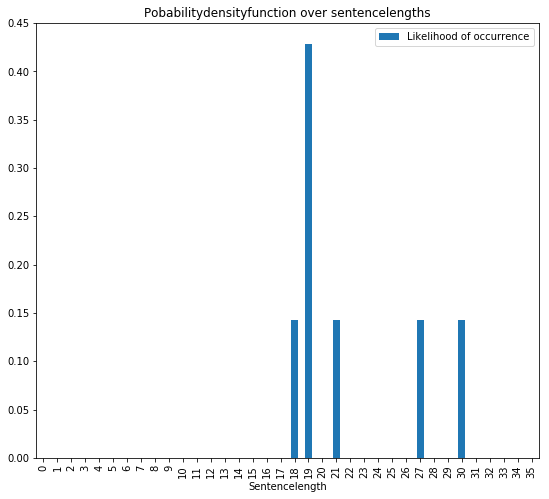

 #### Initialize Displacy Entities Visualizer #### 

Displacy Visualizer for entities per sentence (Text 2)


Dictonary: pdf over sentencelengths for Text 2 

   Sentencelength  Likelihood of occurrence
0               4                       0.5
1              11                       0.5


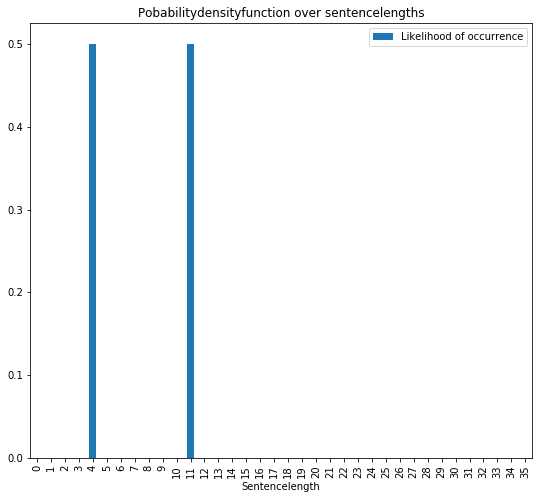

 #### Initialize Displacy Entities Visualizer #### 

Displacy Visualizer for entities per sentence (Text 3)


Dictonary: pdf over sentencelengths for Text 3 

   Sentencelength  Likelihood of occurrence
0               8                  0.333333
1              12                  0.333333
2              14                  0.333333


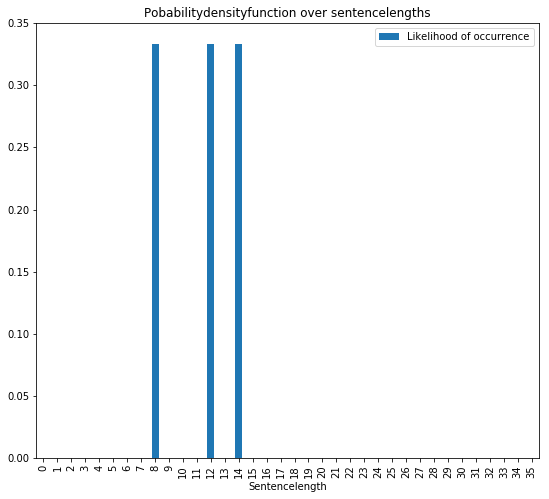

##############

Now it's on to combine all pdf's to get one big pdf
Sentencelength Probabilitydensityfunction of all texts 

##############

Combined pdf for all texts
   Sentencelength  Likelihood of occurrence
0               4                  0.083333
1               8                  0.083333
2              11                  0.083333
3              12                  0.083333
4              14                  0.083333
5              18                  0.083333
6              19                  0.250000
7              21                  0.083333
8              27                  0.083333
9              30                  0.083333


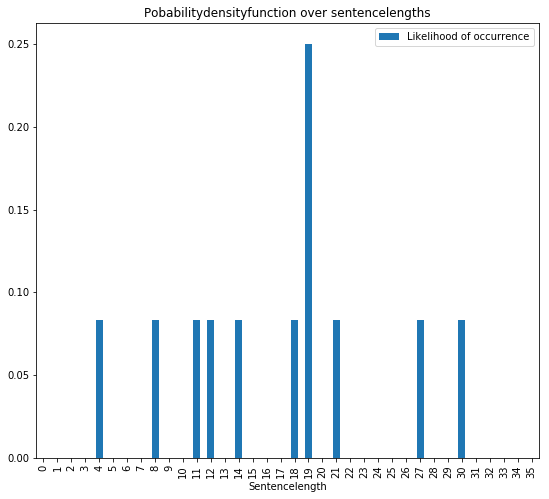

In [537]:
text_tuple =(text, new_text, text_2) ## if you want to analyze more than one text you can insert a tuple of text, there is also the possibilit to pass just one text but as a tuple () with one element
"""
    To analyze a text or more texts just pass the text/s as a tuple to the main. The function analyzes

"""
main(text_tuple)